### Importing Essesntial Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Data Reading

In [13]:
data = pd.read_csv("cricket.csv",usecols = ["ID","Impact Force N"])
# printing columns
print(data.columns,"\n")
# printing top 3 records
print(data.head(3))

Index(['ID', 'Impact Force N'], dtype='object') 

  ID  Impact Force N
0  A           16.12
1  A            6.05
2  A            3.27


### Data Analytics - Statistics View

In [61]:
data.groupby("ID",as_index=False). \
            agg({"Impact Force N":["count","min","max","mean","median","std","var","sem","skew"]})

ID Impact Force N                                                   \
              count   min    max    mean median       std        var   
0  A             20  2.45  16.12  7.0735  5.730  4.245733  18.026245   
1  B             20  0.22   8.15  4.1910  4.605  2.348643   5.516125   

                       
        sem      skew  
0  0.949375  1.111445  
1  0.525173 -0.181412

**<font color='amber'>INSIGHTS</font>**

* There is a high **VARIANCE** between A & B
       
       * Data points from B are close each other - Low Spread
       * Data point from A are not close to each other - High Spread
       * Statistically, there is a clear difference between A & B
       
* The **MEAN** and **STANDARD DEVIATION** for A & B are different

       * Average of A is 7.07 and STD is 4.2. Clearly, there is difference high differenc between avg & std
       * Avergae of B is 4.1 and STD 2.3. Standard Deviation is close to mean
       * Data Points from B are close to each other and points from A are different from B
       
* Data points from A showed **skewness** value 1.11 which mean points are not **symmetric**(not normally distributed)
* Data points from B showed **skewness** value -0.18 which mean points are **normally distributed norm**
* The **standard error** of A(0.94) higher than B(0.52), shows the distributions are different

### Data Analytics - Visualization View

#### Data Distribution

Impact Force N with A


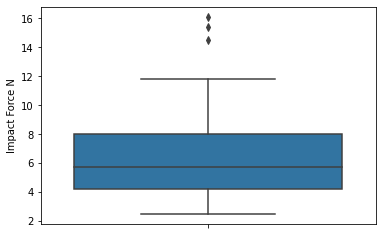

Impact Force N with B


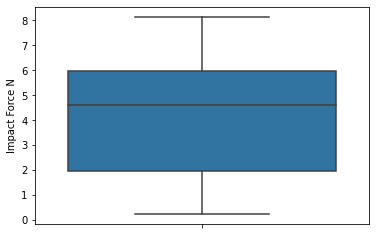

In [58]:
# Boxplot
print("Impact Force N with A")
sns.boxplot(y=data[data["ID"]=="A"]["Impact Force N"])
plt.show()
print("Impact Force N with B")
sns.boxplot(y=data[data["ID"]=="B"]["Impact Force N"])
plt.show()

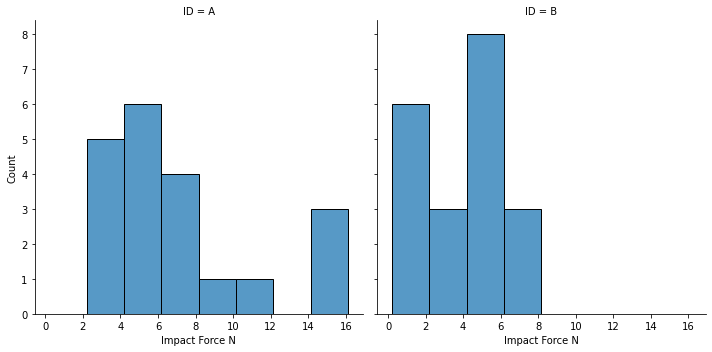

In [57]:
# Frequency Distribution Plot
sns.displot(data, x="Impact Force N", col="ID")
plt.show()

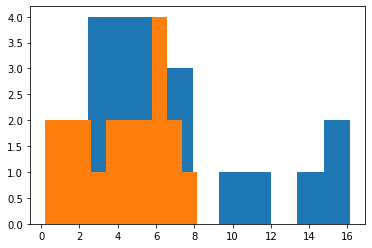

In [55]:
# Distribution Plot
plt.hist(data[data["ID"]=="A"]["Impact Force N"])
plt.hist(data[data["ID"]=="B"]["Impact Force N"])
plt.show()

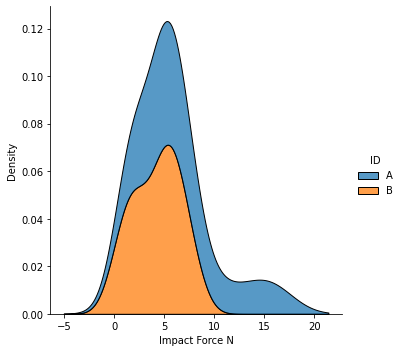

In [46]:
# Standard Distribution Plot
sns.displot(data, x="Impact Force N", hue="ID", kind="kde",multiple="stack")
plt.show()

**<font color='green'>INSIGHTS</font>**

* Boxplot showing the distribution of A & B are different, group A has affected with anomalies

* Group B data points are 0 to 8 and very close to each other. Other side, group A data points between 2 to 16 and high difference between them

* Count of A data points showed equal importance and points from B showed some fluctuations mostly BTW 4 to 6
* Standard Normal Distribution showing points from A have peak place comparatively with B points


### Hypothesis Testing - INDEPDENT T-TEST

* H0: There is a similarity difference between A & B 
* H1: There is no similarity between A & B

In [85]:
# Hypothesis Testing
results = stats.ttest_ind(data[data["ID"]=="A"]["Impact Force N"],
                data[data["ID"]=="B"]["Impact Force N"])

print("Stats Value: ",results[0])
print("P Value: ",results[1],"\n")

if results[1] > 0.05:
    print('There is a similarity difference between A & B  ')
else:
    print('There is no similarity between A & B')

Stats Value:  2.656802191965693
P Value:  0.01147043733890352 

There is no similarity between A & B


**<font color='maroon'>INSIGHTS</font>**

Hypothesis proved that there is a stastically difference between A & B data points

## **<font color='hunter'>CONCLUSION</font>**

The distribution of forces A and B are not similar. Statistically, we proved using descriptive statistics, data visualization and inferential statistics techniques

**The END**